# **Módulo: Aprendizaje no supervisado**
**Reto | Segmentación de datos empleados**
---

In [23]:
from sklearn import cluster, metrics
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler, Normalizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#2.Carga los datos del archivo
df= pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Data16/Train.csv')
#df3 =  df[['Employee_ID', 'Gender','Relationship_Status']]
#df3

In [57]:
#Reemplazar datos faltantes
df2 = df.copy(deep=True)
df2['Age'] = df2['Age'].fillna(df2['Age'].mode()[0])
df2['Time_of_service'] = df2['Time_of_service'].fillna(df2['Time_of_service'].mode()[0])
df2['Pay_Scale'] = df2['Pay_Scale'].fillna(df2['Pay_Scale'].mode()[0])

df2['Work_Life_balance'] = df2['Work_Life_balance'].fillna(df2['Work_Life_balance'].mode()[0])
df2['VAR2'] = df2['VAR2'].fillna(df2['VAR2'].mode()[0])
df2['VAR4'] = df2['VAR4'].fillna(df2['VAR4'].mode()[0])

#Eliminamos los que no haya localizado
df2.dropna()



In [59]:
df_processed = df2.copy(deep=True)

# Drop 'Employee_ID' as it's typically an identifier and not used in clustering
df_processed.drop('Employee_ID', axis=1, inplace=True)

# Handle 'Gender' using OneHotEncoder as was being done previously
enc_gender = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_gender_encoded = enc_gender.fit_transform(df_processed[['Gender']])
gender_categories = enc_gender.categories_[0]
for i, val in enumerate(gender_categories):
  df_processed['Gender_' + str(val)] = X_gender_encoded[:, i]
df_processed.drop('Gender', axis=1, inplace=True) # Drop the original 'Gender' column

# Handle 'Relationship_Status' using OneHotEncoder as was being done previously
enc_Rel = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_rel_encoded = enc_Rel.fit_transform(df_processed[['Relationship_Status']])
rel_categories = enc_Rel.categories_[0]
for i, val in enumerate(rel_categories):
  df_processed['Relationship_Status_' + str(val)] = X_rel_encoded[:, i]
df_processed.drop('Relationship_Status', axis=1, inplace=True) # Drop the original 'Gender' column

# Handle all other remaining object type columns using OrdinalEncoder
for col in df_processed.columns:
    if df_processed[col].dtype == 'object':
        df_processed[col] = OrdinalEncoder().fit_transform(df_processed[[col]])




# Now, all columns should be numeric
X_train = df_processed.to_numpy()

# Apply Normalizer
X = Normalizer().fit_transform(X_train)

# Display the first few rows of the processed and normalized data (optional)
print(X[:5])

[[ 0.7604889   0.07242751  0.01810688  0.03621376  0.03621376  0.07242751
   0.07242751  0.59752699  0.01810688  0.01810688  0.12674815  0.03621376
   0.05432064  0.07242751  0.01360913  0.03383813  0.03621376  0.07242751
   0.09053439  0.05432064  0.00333348  0.01810688  0.          0.01810688
   0.        ]
 [ 0.52825337  0.06603167  0.06603167  0.06603167  0.          0.11005278
   0.08804223  0.79238005  0.          0.06603167  0.13206334  0.04402111
   0.08804223  0.06603167 -0.02115655 -0.00998619  0.04402111  0.06603167
   0.11005278  0.06603167  0.00147471  0.          0.02201056  0.
   0.02201056]
 [ 0.69506517  0.03595165  0.          0.09587106  0.02396776  0.32356482
   0.03595165  0.61117799  0.          0.02396776  0.09587106  0.02396776
   0.01198388  0.04793553 -0.01151891 -0.00543709  0.03595165  0.03595165
   0.09587106  0.03595165  0.00101983  0.01198388  0.          0.01198388
   0.        ]
 [ 0.41025011  0.04733655  0.0315577   0.01577885  0.01577885  0.0631154
  

In [60]:
df_processed

,Age,Education_Level,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,...,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single
0,42.0,4,1.0,2.0,2.0,4.0,4,33,1,1,...,1.8688,2.0,4,5,3,0.1841,1.0,0.0,1.0,0.0
1,24.0,3,3.0,3.0,0.0,5.0,4,36,0,3,...,-0.4537,2.0,3,5,3,0.0670,0.0,1.0,0.0,1.0
2,58.0,3,0.0,8.0,2.0,27.0,3,51,0,2,...,-0.4537,3.0,3,8,3,0.0851,1.0,0.0,1.0,0.0
3,26.0,3,2.0,1.0,1.0,4.0,3,56,1,3,...,-0.4537,2.0,3,7,3,0.0668,1.0,0.0,0.0,1.0
4,31.0,1,3.0,3.0,2.0,5.0,4,62,1,3,...,-0.4537,2.0,2,8,2,0.1827,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,23.0,5,1.0,5.0,1.0,4.0,1,20,1,2,...,-0.4537,2.0,3,7,3,0.7839,1.0,0.0,1.0,0.0
6996,44.0,1,2.0,9.0,0.0,16.0,2,59,0,2,...,-2.7762,2.0,4,8,4,0.1055,1.0,0.0,1.0,0.0
6997,49.0,3,3.0,2.0,3.0,10.0,1,59,1,2,...,-0.4537,2.0,4,8,3,0.7847,1.0,0.0,0.0,1.0
6998,47.0,3,4.0,10.0,1.0,24.0,1,21,1,5,...,1.8688,2.0,3,6,3,0.4162,1.0,0.0,1.0,0.0


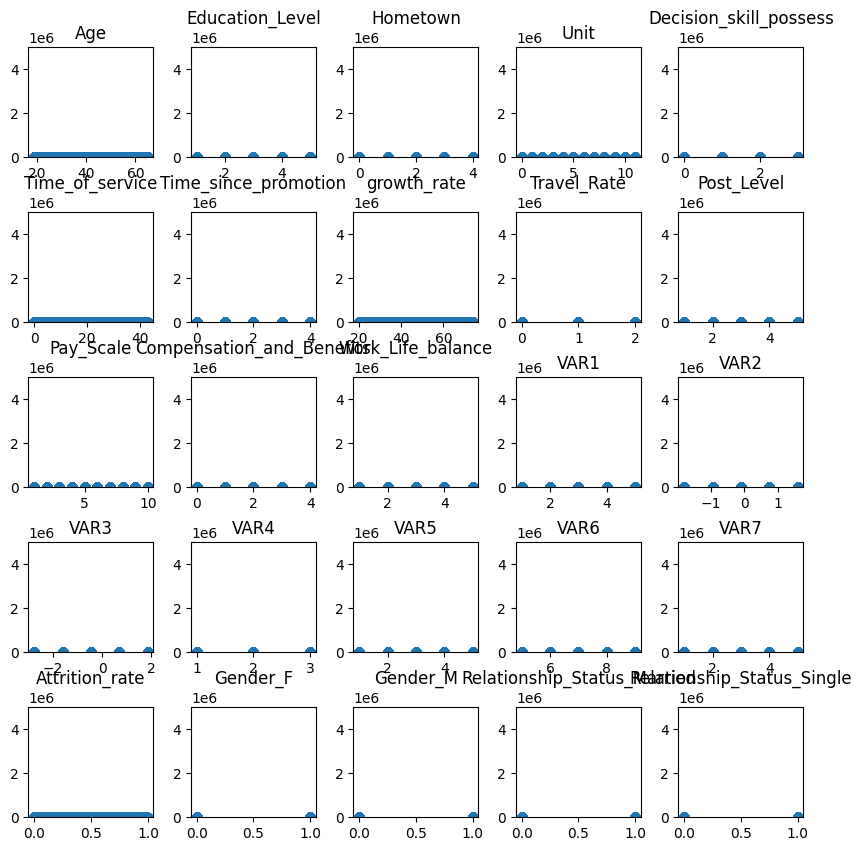

In [66]:
v = 0
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
  for j in range(5):
    axs[i,j].scatter(X_train[:,v], X_train[:,1])
    axs[i,j].set_title(df_processed.columns[v])
    axs[i,j].set_ylim([0,0.5e7])
    v+=1
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [ ]:
#4.Selecciona el número de grupos adecuados para agrupar usando K-means
#a) Ejecuta el algoritmo K-means con distintos números de grupos y almacena los resultados.
#b) Utiliza una estrategia para determinar el número adecuado de grupos como K-Elbow o Silhouette-Plot.

In [ ]:
#5.Segmenta el DataFrame original creando nuevos DataFrames con los empleados separados por grupo:
#a) Crea una nueva tabla resumen con los estadísticos adecuados que describa el comportamiento de las variables por grupo.

In [ ]:
#6.Interpreta los resultados obtenidos:
#a) Genera diferentes visualizaciones que ayuden a mostrar las características que tienen en común los empleados dentro de cada grupo.
#b)Redacta una historia con las conclusiones más importantes del análisis de manera que ayude a la toma de decisiones.